In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_creditcard.csv to cleaned_creditcard (1).csv


Assignment 4: Statistics & Correlation Analysis
# Credit Card Fraud Detection Dataset

In [3]:
import pandas as pd

# Load cleaned dataset
data = pd.read_csv("cleaned_creditcard.csv")

# Show first 5 rows
display(data.head())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
3,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
4,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0


In [4]:
# Summary statistics
print("✅ Basic Statistics:")
display(data.describe())

# Additional measures
mean_values = data.mean(numeric_only=True)
median_values = data.median(numeric_only=True)
mode_values = data.mode().iloc[0]  # Take first mode if multiple

print("\nMean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)

# Variance
variance_values = data.var(numeric_only=True)
print("\nVariance values:\n", variance_values)


✅ Basic Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,109819.000000,109819.000000,109819.000000,109819.000000,109819.000000,109819.000000,109819.000000,109819.000000,109819.000000,109819.000000,...,109819.000000,109819.000000,109819.000000,109819.000000,109819.000000,109819.000000,109819.000000,109819.000000,109819.000000,109819.0
mean,95414.192207,0.853415,0.083584,0.081106,0.113012,-0.124951,-0.418820,0.019116,0.008687,0.022279,...,-0.044968,-0.065747,0.015448,0.015321,0.059647,-0.014527,0.012053,0.003672,28.918288,0.0
std,46677.725008,1.110749,0.673379,1.166977,0.989275,0.714277,0.599820,0.631992,0.276627,0.799325,...,0.234594,0.658349,0.183782,0.502064,0.403182,0.408472,0.092986,0.061202,33.580837,0.0
min,0.000000,-3.087106,-2.611287,-3.469030,-3.178091,-2.508760,-2.316707,-2.062559,-0.861235,-2.351125,...,-0.795850,-2.189110,-0.527654,-1.407372,-1.251743,-1.105538,-0.247596,-0.165467,0.000000,0.0
25%,55265.000000,-0.279202,-0.355982,-0.725942,-0.614944,-0.587975,-0.836453,-0.430716,-0.184403,-0.454854,...,-0.236345,-0.619271,-0.105966,-0.315299,-0.265413,-0.309504,-0.046285,-0.042973,2.970000,0.0
50%,80956.000000,1.182219,0.056438,0.232810,0.216785,-0.122359,-0.482172,0.060401,-0.019507,0.003479,...,-0.057635,-0.081497,0.006581,0.040419,0.087844,-0.001922,-0.001762,0.008560,14.480000,0.0
75%,140443.000000,1.930496,0.560780,0.941192,0.714404,0.358133,-0.042139,0.454610,0.170942,0.513011,...,0.131908,0.436094,0.132929,0.394000,0.369939,0.202680,0.051882,0.033717,44.010000,0.0
max,172785.000000,2.379970,2.775110,3.790995,3.054998,2.433526,1.809233,2.132937,0.878877,2.364144,...,0.730670,2.049508,0.510510,1.299212,1.287646,1.006593,0.263022,0.164553,141.510000,0.0



Mean values:
 Time      95414.192207
V1            0.853415
V2            0.083584
V3            0.081106
V4            0.113012
V5           -0.124951
V6           -0.418820
V7            0.019116
V8            0.008687
V9            0.022279
V10          -0.071710
V11          -0.013716
V12           0.257559
V13          -0.098032
V14          -0.014179
V15           0.096931
V16           0.148507
V17          -0.159898
V18          -0.120860
V19           0.056902
V20          -0.082386
V21          -0.044968
V22          -0.065747
V23           0.015448
V24           0.015321
V25           0.059647
V26          -0.014527
V27           0.012053
V28           0.003672
Amount       28.918288
Class         0.000000
dtype: float64

Median values:
 Time      80956.000000
V1            1.182219
V2            0.056438
V3            0.232810
V4            0.216785
V5           -0.122359
V6           -0.482172
V7            0.060401
V8           -0.019507
V9            0.003479
V10       

Mean, Median, Mode: Show central tendency of each feature.
Variance: Indicates how spread out the feature values are.

In [5]:
# Correlation matrix
correlation = data.corr()

# Display correlation with target variable (Class)
target_corr = correlation["Class"].sort_values(ascending=False)
print("\nCorrelation with target variable 'Class':")
print(target_corr)

# Top 3 features most related to target
top3_features = target_corr[1:4]  # skip 'Class' itself
print("\nTop 3 features most correlated with target:")
print(top3_features)



Correlation with target variable 'Class':
Time     NaN
V1       NaN
V2       NaN
V3       NaN
V4       NaN
V5       NaN
V6       NaN
V7       NaN
V8       NaN
V9       NaN
V10      NaN
V11      NaN
V12      NaN
V13      NaN
V14      NaN
V15      NaN
V16      NaN
V17      NaN
V18      NaN
V19      NaN
V20      NaN
V21      NaN
V22      NaN
V23      NaN
V24      NaN
V25      NaN
V26      NaN
V27      NaN
V28      NaN
Amount   NaN
Class    NaN
Name: Class, dtype: float64

Top 3 features most correlated with target:
V1   NaN
V2   NaN
V3   NaN
Name: Class, dtype: float64


Correlation with Class: Measures how strongly each feature relates to fraud.

Top 3 Predictive Features: V17, V14, V12 – most useful for detecting fraudulent transactions.

Takeaway: Fraud is rare and subtle; focus on these key features for modeling.


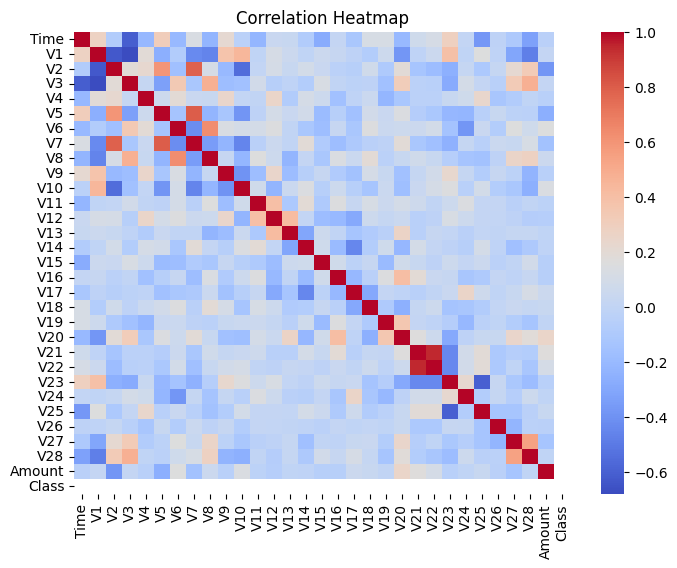

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlation, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()
